In [3]:
import mtcnn
from keras_vggface.vggface import VGGFace
import matplotlib.pyplot as plt
from keras_vggface import utils
from PIL import Image
from scipy.spatial.distance import cosine
import numpy as np
def extract_face(filename, size=(224,224)):
    pixels = plt.imread(filename)
    detector = mtcnn.MTCNN()
    results = detector.detect_faces(pixels)
    x1,y1,width,height = results[0]['box']
    x2,y2 = x1+width, y1+height
    face = pixels[y1:y2,x1:x2]
    image = Image.fromarray(face)
    image = image.resize(size)
    plt.imshow(image)
    return np.asarray(image)

def generate_embeddings(files):
    faces=[]
    for f in files:
        faces.append(extract_face(f))
    samples = np.asarray(faces,np.float32)
    samples = utils.preprocess_input(samples,version=2)
    model = VGGFace(include_top=False, model='senet50', input_shape=(224,224,3))
    y = model.predict(samples)
    return y

def is_match(embd_1,embd_2,theta = 0.5):
    score = cosine(embd_1,embd_2)
    print(score)
    if score<theta:
        return True
    else:
        return False

def face_identification(filename):
    pixles = extract_face(filename)
    pixles = pixles.astype('float32')
    samples = np.expand_dims(pixles,axis=0)
    samples = utils.preprocess_input(samples,version=2)

    model = VGGFace(model='resnet50')
    yhat= model.predict(samples)

    results = utils.decode_predictions(yhat)

    for r in results[0]:
        print('%s: %.3f%%' % (r[0],r[1]*100))



1/1 [==============================] - 1s 1s/step
0.33208489418029785
Same person


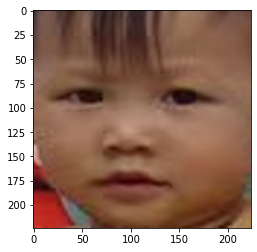

In [6]:
def face_verification(file1,file2):
    embeddings = generate_embeddings([file1,file2])
    if is_match(embd_1=embeddings[0],embd_2=embeddings[1]):
        print('Same person')
    else:
        print('Not same person')
        
face_verification('hhhdd1.jpg','hhh4.jpg')
# face_identification('hhh1.jpg')
    